In [125]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.optimize import root,bisect

In [265]:
sns.set_style('white')

## Яма с бесконечными стенками
We have $$E_{nl} = \frac{\hbar^2}{2ma^2}\beta_{nl}^2$$
Перейдем в атомарные едеиницы: $\hbar = 1, m = 1, a = 5$

In [4]:
#Пусть l=0, n=1
n = 5
A = [] 
for i in range(n): 
    A.append(list(map(float, input().split())))


3.142 6.283 9.425 12.566
4.493 7.725 10.904 14.066
5.763 9.095 12.323 15.515
6.988 10.417 13.698 16.924
8.183 11.705 15.040 18.301


In [18]:
Arr =  np.asarray(A)
print (Arr)

[[  3.142   6.283   9.425  12.566]
 [  4.493   7.725  10.904  14.066]
 [  5.763   9.095  12.323  15.515]
 [  6.988  10.417  13.698  16.924]
 [  8.183  11.705  15.04   18.301]]


In [48]:
E = Arr**2 / (2.0*a**2)
#print (E)
names = ['n=1', ]
df = pd.DataFrame(E)
df.columns = [r"$n=1$",r"$n=2$",r"$n=3$",r"$n=4$"]

print (df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &     \$n=1\$ &     \$n=2\$ &     \$n=3\$ &     \$n=4\$ \\
\midrule
0 &  0.197443 &  0.789522 &  1.776613 &  3.158087 \\
1 &  0.403741 &  1.193512 &  2.377944 &  3.957047 \\
2 &  0.664243 &  1.654381 &  3.037127 &  4.814305 \\
3 &  0.976643 &  2.170278 &  3.752704 &  5.728436 \\
4 &  1.339230 &  2.740140 &  4.524032 &  6.698532 \\
\bottomrule
\end{tabular}



In [49]:
df

,$n=1$,$n=2$,$n=3$,$n=4$
0,0.197443,0.789522,1.776613,3.158087
1,0.403741,1.193512,2.377944,3.957047
2,0.664243,1.654381,3.037127,4.814305
3,0.976643,2.170278,3.752704,5.728436
4,1.339230,2.740140,4.524032,6.698532


## Яма с конечными стенками


$$\tan \bigg(\frac{2mV_0}{\hbar^2}a\sqrt{1-\frac{|E|}{V_0}}\bigg)=-\sqrt{\frac{|E|}{V_0}-1}$$
Перенесем все в одну часть, и положим $a=5, m=1, \hbar=1, V_0 =20$

In [73]:
V_0=10.0
a=5.0
def f(x):
    return np.tan(2*V_0*a*np.sqrt(1-x/V_0))+np.sqrt(V_0/x-1)

(-20, 20)

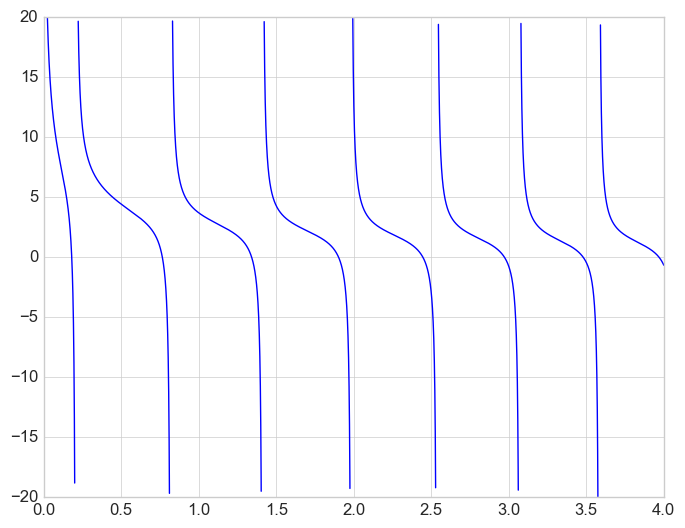

In [284]:
xx = np.linspace(0,4,10000)
yy = f(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
#plt.plot(ens[ens<=4],np.zeros_like(ens[ens<=4]),'o')
plt.grid(True)
plt.ylim([-20,20])

In [92]:
def f1(x):
    return np.tan(2*V_0*a*np.sqrt(1-x/V_0))

def f2(x):
    return -np.sqrt(V_0/x-1)

In [257]:
print(plt.style.available)

['seaborn-poster', 'grayscale', 'seaborn-bright', 'seaborn-notebook', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-colorblind', 'bmh', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-dark', 'seaborn-talk', 'seaborn-pastel', 'dark_background', 'classic', 'fivethirtyeight', 'seaborn-ticks', 'ggplot']


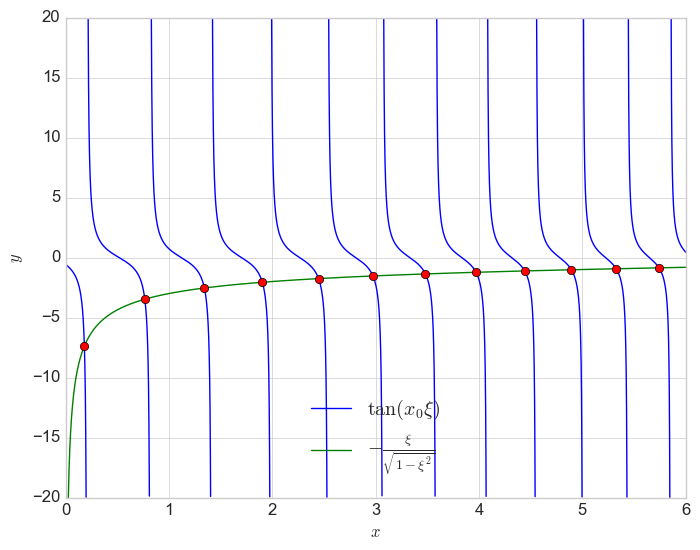

In [282]:
xx = np.linspace(0,6,100000)
yy1 = f1(xx)
yy2 = f2(xx)
yy1[yy1>20] = np.inf
yy1[yy1<-20] = np.inf
yy2[yy2>20] = np.inf
yy2[yy2<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy1,label=r'$\tan(x_0 \xi)$')
plt.plot(xx,yy2,label=r'$-\frac{\xi}{\sqrt{1-\xi^2}}$')
plt.plot(ens[ens<=6],f1(ens[ens<=6]),'o')
plt.legend(loc='best')
plt.ylim([-20,20])
#plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig('tan-sqrt.pdf')

In [219]:
print (root(f,1.0).x)

[ 1.34133445]


In [220]:
print (bisect(f,0.05,0.2))

0.18021666623499186


In [221]:
x0 = np.arange(0.01,V_0,step=0.1)

In [222]:
ens = []
for step in x0:
    ens.append(root(f,step).x[0])

In [223]:
ens = (np.asarray((list((set(ens))))))

In [224]:
ens.sort()
print (ens)

[ 0.18021667  0.18021667  0.76501696  0.76501696  0.76501696  0.76501696
  0.76501696  0.76501696  1.34133445  1.34133445  1.34133445  1.34133445
  1.34133445  1.34133445  1.34133445  1.90238987  1.90238987  1.90238987
  1.90238987  2.44644499  2.44644499  2.44644499  2.44644499  2.44644499
  2.97272142  2.97272142  2.97272142  2.97272142  2.97272142  3.48078611
  3.48078611  3.48078611  3.48078611  3.48078611  3.97036679  3.97036679
  3.97036679  3.97036679  3.97036679  4.44127815  4.44127815  4.44127815
  4.44127815  4.44127815  4.89338683  4.89338683  4.89338683  4.89338683
  5.32659283  5.32659283  5.32659283  5.32659283  5.32659283  5.74081873
  5.74081873  5.74081873  6.13600312  6.13600312  6.13600312  6.13600312
  6.51209628  6.51209628  6.51209628  6.86905732  6.86905732  6.86905732
  7.20685217  7.20685217  7.20685217  7.20685217  7.52545212  7.52545212
  7.52545212  7.82483278  7.82483278  7.82483278  8.10497329  8.10497329
  8.3658557   8.3658557   8.3658557   8.60746452  8

In [225]:
counter = 0
while(counter < 10):
    ind = []
    for i in range(1,ens.shape[0]):        
        if (np.abs(ens[i]-ens[i-1]) < 1e-5):
            ind.append(i)
    print (ind)
    ens = np.delete(ens,np.asarray(ind))
    counter+=1

[1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 49, 50, 51, 52, 54, 55, 57, 58, 59, 61, 62, 64, 65, 67, 68, 69, 71, 72, 74, 75, 77, 79, 80, 82, 84, 85, 88, 90]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [226]:
print (ens)

[ 0.18021667  0.76501696  1.34133445  1.90238987  2.44644499  2.97272142
  3.48078611  3.97036679  4.44127815  4.89338683  5.32659283  5.74081873
  6.13600312  6.51209628  6.86905732  7.20685217  7.52545212  7.82483278
  8.10497329  8.3658557   8.60746452  8.82978636  9.0328096   9.21652422
  9.38092156  9.52599421  9.65173584  9.75814116  9.84520582  9.9129263 ]


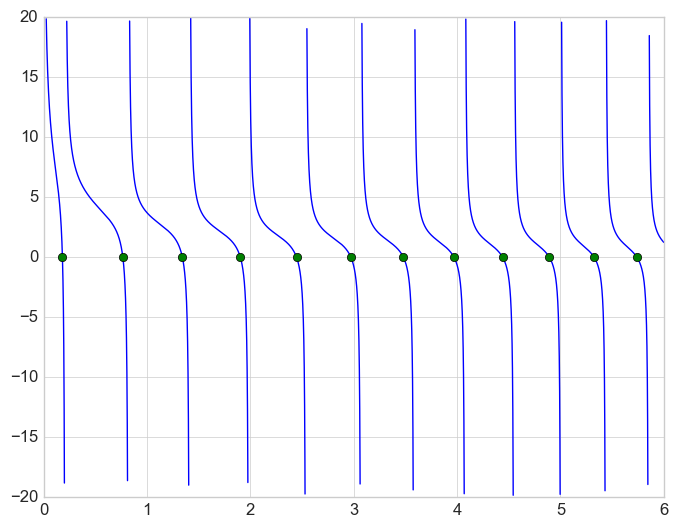

In [287]:
xx = np.linspace(0,6,10000)
yy = f(xx)
yy[yy>20] = np.inf
yy[yy<-20] = np.inf
plt.style.use('seaborn-whitegrid')
plt.plot(xx,yy)
plt.plot(ens[ens<=6],np.zeros_like(ens[ens<=6]),'o')
plt.grid(True)
plt.ylim([-20,20])
plt.savefig('finite_well.pdf')